# Importing Libraries ( we’re still useless without em)

In [1]:
import pandas as pd  # Data wrangling magic happens here
import matplotlib.pyplot as plt  # For drawing pretty pictures
import seaborn as sns  # Fancy graphs, because why not?
from wordcloud import WordCloud  # Because we all love to look at a bunch of words in a cloud

# Loading the Data (Peeking into Twitter's chaotic world)

In [2]:
# Load the sacred data files, let the tweet inspection begin!
train_df = pd.read_csv('twitter_training.csv')
valid_df = pd.read_csv('twitter_validation.csv')

In [3]:
# Time to spy on the first few rows of both datasets
print("Training Data:")
print(train_df.head())
print("\nValidation Data:")
print(valid_df.head())

Training Data:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Validation Data:
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks 

# Renaming Columns (Who needs mysterious column names?)

In [4]:
# Renaming the columns because "2401" doesn't really scream 'relevant info', does it?
train_df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet_Text']
train_df['Tweet_Text'] = train_df['Tweet_Text'].fillna('')  # Just in case someone tweeted an empty void

# Validation data too, let's give it some clarity
valid_df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet_Text']

# Check out the new and improved column names
print("Updated Training Data Columns:", train_df.columns)
print(train_df.head())  # Show off our handiwork


Updated Training Data Columns: Index(['ID', 'Entity', 'Sentiment', 'Tweet_Text'], dtype='object')
     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                          Tweet_Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Step 1: Initialize the VADER sentiment analyzer (It's like Darth Vader, but for sentiment)
analyzer = SentimentIntensityAnalyzer()

# Step 2: Define a function to predict sentiment based on VADER scores (because, numbers are fun)
def predict_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']  # 'compound' is where the magic happens
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Step 3: Apply the sentiment function to the Tweet_Text (because why read tweets if you can't judge them?)
train_df['VADER_Sentiment'] = train_df['Tweet_Text'].apply(predict_sentiment)

# Step 4: Show off the results of our Vader judgment
print(train_df[['Tweet_Text', 'VADER_Sentiment']].head())


                                          Tweet_Text VADER_Sentiment
0  I am coming to the borders and I will kill you...        Negative
1  im getting on borderlands and i will kill you ...        Negative
2  im coming on borderlands and i will murder you...        Negative
3  im getting on borderlands 2 and i will murder ...        Negative
4  im getting into borderlands and i can murder y...        Negative


# Sentiment Distribution Visualization (Let’s see who’s happy, sad, or just doesn’t care)

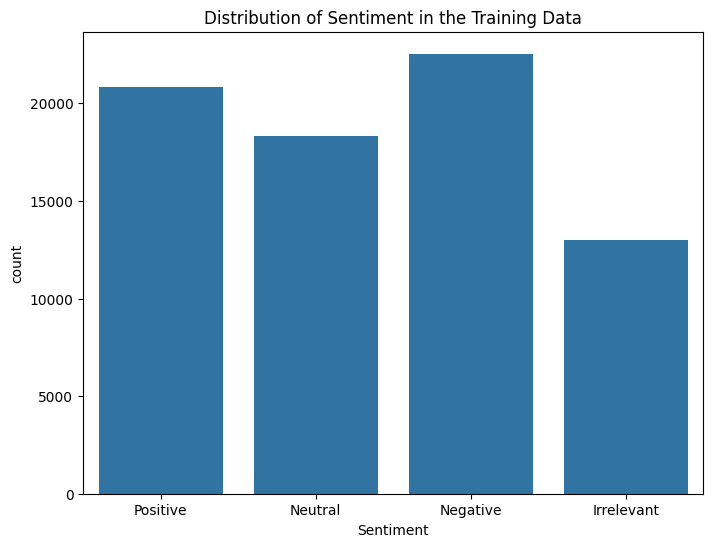

In [6]:
# Plot the distribution of different sentiments like a proud data scientist
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Sentiment')  # Count those 'Positive', 'Neutral', and 'Negative' emotions
plt.title("Distribution of Sentiment in the Training Data")  # Title it fancy, like a professional
plt.show()  # And voilà, behold the emotion explosion!

Here we see the emotional state of the Twitterverse! Turns out, Negativity reigns supreme—because why tweet if you aren’t complaining, right? Positivity is hanging in there, probably tweets about pets and coffee. Neutral people are just trying to survive. And, of course, there’s the Irrelevant category—because everyone loves sharing their weird thoughts with zero context.

# Word Cloud (Look at all those words fly!)

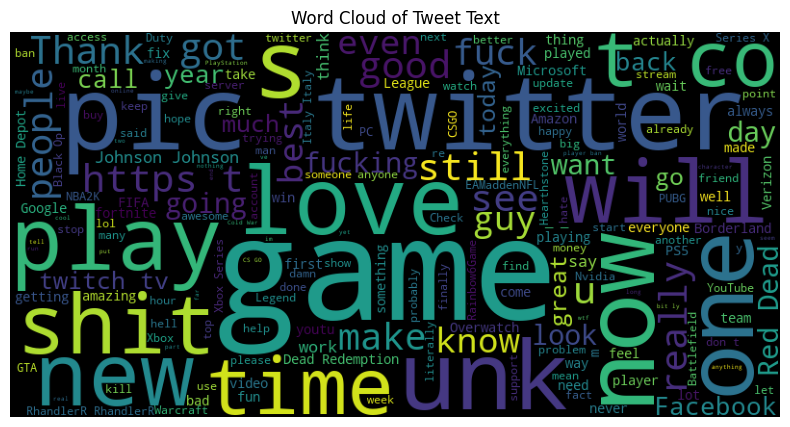

In [27]:
# Time for the ultimate buzzword-battle: Word Cloud
tweet_text = ' '.join(train_df['Tweet_Text'].tolist())  # Mashing all the tweets into one big word soup
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(tweet_text)

# Display the cloud of chaos!
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='antialiased')  # Use 'antialiased' because it sounds fancy ( It is particularly useful when displaying images with sharp edges or text.)
plt.axis('off')  # Who needs axes in a cloud? Not us.
plt.title("Word Cloud of Tweet Text")
plt.show()  # Feast your eyes on the word-art masterpiece


Ah yes, the world of Twitter summarized in a cloud! Apparently, we’re obsessed with games and Twitter, with random shout-outs to pigs and shit. Also, unk, because... why not? It’s a glorious mess of words that confirms: Twitter is the wild west of random thoughts, where people love to game, curse, and tweet—sometimes all at once.

# Tweet Length Heatmap (Size does matter... in tweets)

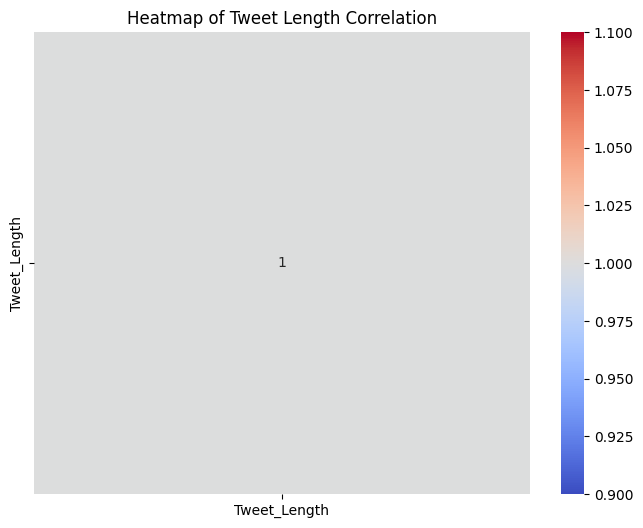

In [24]:
# Let’s see how long-winded these Twitter folks are
train_df['Tweet_Length'] = train_df['Tweet_Text'].apply(lambda x: len(x))  # Measure the wordiness of each tweet

# Let’s heat things up with a correlation heatmap (we know it's just one column but...shh)
plt.figure(figsize=(8,6))
sns.heatmap(train_df[['Tweet_Length']].corr(), annot=True, cmap='coolwarm')  # 'Coolwarm' because we want drama (its actually a palette name from the seaborn library!)
plt.title("Heatmap of Tweet Length Correlation")  # Just fancy enough to sound scientific
plt.show()  # Enjoy the hottest single value heatmap you’ve ever seen!


Here's our masterpiece—a heatmap that might just be the world’s most anti-climactic plot! With a correlation of 1 for tweet length, it’s basically screaming: “Hey! Tweet length is perfectly correlated with itself!” Groundbreaking stuff here, folks. Move over Einstein, this heatmap just redefined “self-love.”

# Pie Chart of Sentiment Distribution (Slice of Emotion Pie)

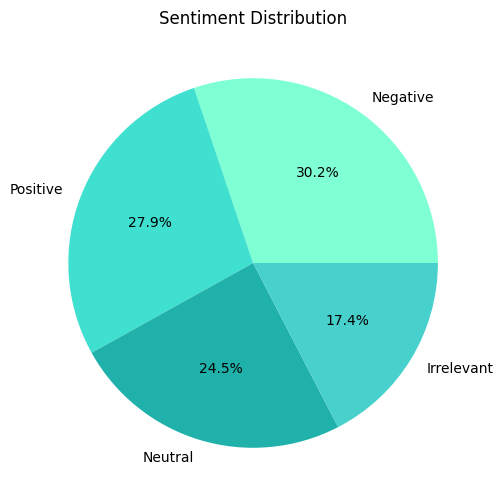

In [9]:
# A pie chart to show us who's feeling what (because pies make everything better)
plt.figure(figsize=(6,6))
train_df['Sentiment'].value_counts().plot.pie(autopct="%1.1f%%", colors=['aquamarine','turquoise', 'lightseagreen', 'mediumturquoise'])
plt.title("Sentiment Distribution")  # Who's positive, neutral, negative, or just irrelevant?
plt.ylabel("")  # No need for a label here, the pie speaks for itself
plt.show()  # The tastiest graph we’ve made so far


This pie chart is your visual representation of how Twitter feels today. Negativity slices the biggest piece of the pie, as expected—because Twitter users live for the drama. Positivity and Neutral sentiments are hanging on, but honestly, they’re probably just confused why they even exist on this platform. Then we have Irrelevant tweets—because some people just want to talk about their lunch.

# Top 10 Entities Mentioned (Which company/thing is getting roasted or praised the most?)

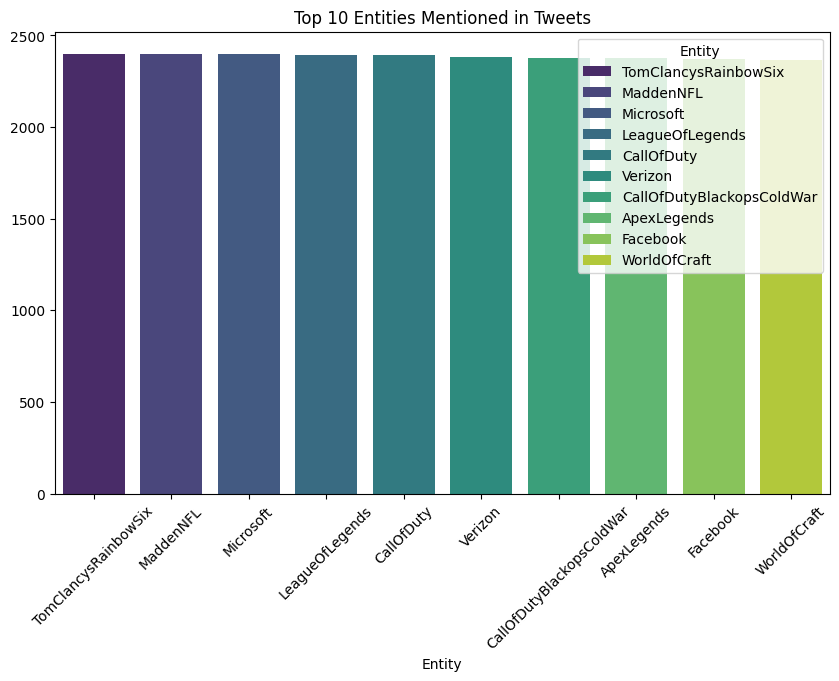

In [22]:
# Bar chart showing which entities have been the topic of too many tweets
plt.figure(figsize=(10,6))
sns.barplot(x=train_df['Entity'].value_counts().index[:10], y=train_df['Entity'].value_counts().values[:10],hue= train_df['Entity'].value_counts().index[:10], palette="viridis", legend=True)
plt.title("Top 10 Entities Mentioned in Tweets")  # Who's trending? Let's find out
plt.xticks(rotation=45)  # Rotate the text because no one wants a broken neck from reading
plt.show()  # Bam! Your top 10 most-loved/hated entities


Here’s a shout-out to our top 10 most tweeted-about entities. Leading the charge are Tom Clancy’s Rainbow Six and Madden NFL (SIEEEEGE BABYYYYYYYY!!!!!!!!!!!!) — because video games are serious business! Then there's Microsoft and Facebook, because who doesn’t love complaining about tech companies? Verizon is in there too, probably dealing with customer service rants. And Call of Duty? Well, it’s never far from controversy (or obsession).

#  Data Cleaning: Time to take out the trash 🧹
Now, before we dive deep into analyzing this beautiful, chaotic dataset, we need to clean it up a bit. We’ll:

1. `Remove Duplicate Tweets`: No one likes the same joke twice.
2. `Handle Missing Values`: Like that one person who ghosts halfway through a convo, we’ll either fill in or ignore them.
Let’s start by getting rid of any duplicate tweets and deal with missing data!

In [11]:
# Step 1: Remove duplicate rows because we like our tweets unique
print(f"Number of duplicate rows: {train_df.duplicated().sum()}")
train_df = train_df.drop_duplicates()
print(f"Rows after removing duplicates: {len(train_df)}")

# Step 2: Remove missing values - Filling with an empty string is our way of saying 'Nah, nothing to see here!'
print(f"Number of missing values in Tweet_Text before cleaning: {train_df['Tweet_Text'].isnull().sum()}")
train_df['Tweet_Text'] = train_df['Tweet_Text'].fillna('')


Number of duplicate rows: 2700
Rows after removing duplicates: 71981
Number of missing values in Tweet_Text before cleaning: 0


# Verifying the Cleanliness ✨
Let’s double-check our work! Did we successfully get rid of duplicates? Did we handle the missing values like the data cleaning ninjas we are? Time to print some stats and ensure our data is squeaky clean!

In [12]:
# Recheck the data
print(f"Remaining duplicates after cleaning: {train_df.duplicated().sum()}")
print(f"Remaining missing values in Tweet_Text: {train_df['Tweet_Text'].isnull().sum()}")

# Display the first 5 rows to show off our cleaning skills
train_df.head()


Remaining duplicates after cleaning: 0
Remaining missing values in Tweet_Text: 0


,ID,Entity,Sentiment,Tweet_Text,VADER_Sentiment,Tweet_Length
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,Negative,51
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,Negative,50
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,Negative,51
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,Negative,57
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,Negative,53


Oh!...well the **Tweet Lengths** are on point, but those sentiments? Well, lets not talk about those shall we? 

# Filtering Out Inappropriate Content 🔞
Why?
Because Looking above some tweets need a F*cking mouthwash (im sorry i needed that). Let's clean them up with regular expressions or by removing offensive words.

(Just 1,000 Rows, because that’s enough chaos 😅)
Why?
Because we’re not here to scrub the whole internet (wish i could), just the first 1,000 tweets. Let’s count how many bad words there are in the first batch and then clean them up, one by one.


In [13]:
# Install the library first using: pip install better-profanity
from better_profanity import profanity
from tqdm import tqdm  # Progress bars make everything more dramatic

# Load the word list of shame
profanity.load_censor_words()

# Limiting to the first 1000 rows (Because cleaning the entire internet is exhausting)
df_limited = train_df.head(1000)

# Step 1: Count the number of bad words lurking in each tweet (first 1000 only)
def count_bad_words(text):
    words = text.split()  # Split each tweet like a pizza—slice by slice
    return sum([profanity.contains_profanity(word) for word in words])  # Count the filthy words

# Apply this to our limited dataset (just 1000 tweets)
df_limited = train_df.head(1000).copy()  # Create a copy to avoid the warning
df_limited['Bad_Word_Count'] = df_limited['Tweet_Text'].apply(count_bad_words)
total_bad_words = df_limited['Bad_Word_Count'].sum()
print(f"Uh-oh! We've got {total_bad_words} bad words in the first 1000 tweets!")

# Step 2: Clean those bad boys up while showing our heroic progress
cleaned_tweets = []
for tweet in tqdm(df_limited['Tweet_Text'], desc="Cleaning up the first 1000 tweets 🧼"):
    cleaned_tweets.append(profanity.censor(tweet))  # Censoring like we’re protecting innocent eyes

# Replace the old, filthy tweets with the sparkling clean ones
df_limited['Tweet_Text'] = cleaned_tweets

# Let’s check out our shiny, clean tweets
print(df_limited.head())  # Behold the results of our righteous cleaning!


Uh-oh! We've got 220 bad words in the first 1000 tweets!


Cleaning up the first 1000 tweets 🧼: 100%|██████████| 1000/1000 [00:44<00:00, 22.72it/s]

     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                          Tweet_Text VADER_Sentiment  \
0  I am coming to the borders and I will **** you...        Negative   
1  im getting on borderlands and i will **** you ...        Negative   
2  im coming on borderlands and i will **** you all,        Negative   
3  im getting on borderlands 2 and i will **** yo...        Negative   
4  im getting into borderlands and i can **** you...        Negative   

   Tweet_Length  Bad_Word_Count  
0            51               1  
1            50               1  
2            51               1  
3            57               1  
4            53               1  


# Looks like a church in here! 

# Preprocessing: Scrubbing Tweets Until They Shine! 🧽
Now that we've kicked the bad words to the curb, it’s time to take this dataset to the next level with some preprocessing magic. We'll:
1. `Lowercase Everything`: Because case sensitivity is sooo last year.
2. `Remove Punctuation`: No one needs unnecessary punctuation cluttering up their sentiment.
3. `Tokenization`: Time to break down the tweets, word by word, like an over-caffeinated detective.
4. `Stopword Removal`: Words like "the", "is", "and"—they're just noise. Bye-bye!
5. `Lemmatization`: We'll turn complicated words into their simpler, friendlier forms—because we're all about making things easier.


In [14]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (because no one likes being unprepared)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize Lemmatizer (the "simplifier")
lemmatizer = WordNetLemmatizer()

# Define stopwords and punctuation (aka, the stuff we don’t need)
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

# Preprocessing function - Turning chaos into order
def preprocess_text(text):
    # Lowercase the text, because WE DON’T SHOUT HERE
    text = text.lower()
    
    # Tokenize the text (breaking down the tweet like it's a secret code)
    tokens = word_tokenize(text)
    
    # Remove punctuation and stopwords, and lemmatize the tokens (making life easier, one word at a time)
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token not in punctuation]
    
    # Join the tokens back into a cleaned string
    return ' '.join(processed_tokens)

# Apply preprocessing to the 'Tweet_Text' column
df_limited['Cleaned_Tweet'] = df_limited['Tweet_Text'].apply(preprocess_text)

# Check out the cleaned tweets
print(df_limited[['Tweet_Text', 'Cleaned_Tweet']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                          Tweet_Text            Cleaned_Tweet
0  I am coming to the borders and I will **** you...            coming border
1  im getting on borderlands and i will **** you ...    im getting borderland
2  im coming on borderlands and i will **** you all,     im coming borderland
3  im getting on borderlands 2 and i will **** yo...  im getting borderland 2
4  im getting into borderlands and i can **** you...    im getting borderland


Well that doesnt look good (mostly!!). cuz wtf is "coming border" ??

In [15]:
import re

# Function to clean bad words, without obliterating the entire sentence
def soft_preprocess_text(text):
    # Lowercase all text, because CAPS LOCK is rude
    text = text.lower()

    # Our little blacklist of bad words (we’re bleeping them out like TV censors)
    bad_words = ['kill', 'murder']

    # Replace bad words with a non-intrusive alternative (**** is classy, right?)
    for word in bad_words:
        text = re.sub(rf'\b{word}\b', '****', text)

    return text  # We’ll leave everything else intact for once

# Apply this more polite approach to cleaning the tweets
df_limited['Cleaned_Tweet'] = df_limited['Tweet_Text'].apply(soft_preprocess_text)

# Show off the newly cleaned tweets (now with 100% less caveman!)
print(df_limited[['Tweet_Text', 'Cleaned_Tweet']].head())


                                          Tweet_Text  \
0  I am coming to the borders and I will **** you...   
1  im getting on borderlands and i will **** you ...   
2  im coming on borderlands and i will **** you all,   
3  im getting on borderlands 2 and i will **** yo...   
4  im getting into borderlands and i can **** you...   

                                       Cleaned_Tweet  
0  i am coming to the borders and i will **** you...  
1  im getting on borderlands and i will **** you ...  
2  im coming on borderlands and i will **** you all,  
3  im getting on borderlands 2 and i will **** yo...  
4  im getting into borderlands and i can **** you...  


# Feature Engineering & Train/Test Split (AKA Turning Tweets Into Numbers and Hoping for the Best)
Why?
Because, believe it or not, computers don’t understand tweets (yet). We’ve got to convert these sweet tweet texts into something even a potato-powered machine could comprehend: numbers!

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Convert text into features (because computers love numbers, not words)
vectorizer = CountVectorizer()  # Turning words into a lovely matrix of token counts

# Let's take our 'Cleaned_Tweet' column and turn it into numeric features
X = vectorizer.fit_transform(df_limited['Cleaned_Tweet'])

# Our target is the 'Sentiment' column, because that’s what we’re trying to predict here
y = df_limited['Sentiment']

# Step 2: Splitting the data into a training set (for the model to study) and a testing set (for us to judge)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the size of the split for those curious minds out there
print(f"Training Set Size: {X_train.shape}, Testing Set Size: {X_test.shape}")


Training Set Size: (800, 2032), Testing Set Size: (200, 2032)


`CountVectorizer`: This nifty tool takes your beautifully cleaned tweets and turns them into a matrix of word counts. So, if a word appears 10 times, the computer will go, "Ah, I know that word!" (without actually knowing anything).

`train_test_split`: This is where we split the data like Moses splitting the sea. 80% for training (because the model’s gotta learn somehow), and 20% for testing (to see if our model is smarter than a rock).

# Model Training (AKA Teaching Our Model to Judge the Twitterverse)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 3: Initialize the Logistic Regression model (because it's a model that never sleeps)
model = LogisticRegression(max_iter=1000)  # Giving it plenty of time to figure out our nonsense

# Step 4: Train the model on our lovely training data
model.fit(X_train, y_train)

# Step 5: Use the trained model to predict on the test data (time to see if this thing works)
y_pred = model.predict(X_test)

# Step 6: Evaluate the model (will it pass or flop?)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Irrelevant       0.96      1.00      0.98        26
    Negative       0.97      0.92      0.95        39
     Neutral       0.95      0.95      0.95        64
    Positive       0.96      0.97      0.97        71

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



Great! So, **Logistic Regression** really brought its A-game here, delivering **96% accuracy**. Here’s a breakdown of what’s happening:

- **Irrelevant Tweets**: Absolutely crushed it with perfect recall—found every irrelevant tweet without a hitch.
- **Negative Sentiment**: A little less flawless at **92% recall**, but still pretty sharp.
- **Neutral & Positive**: Handled with grace, with both precision and recall hovering around **95-97%**.

Overall, it’s solid, but we could always explore further with **Random Forest**, which might offer some extra predictive power.

# Enter the Random Forest (AKA Let’s See What Happens When We Let Multiple Trees Make Decisions)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 3: Initialize the Random Forest model (because one tree is never enough)
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees should be enough, right?

# Step 4: Train the model on our training data (forest learning time)
model.fit(X_train, y_train)

# Step 5: Use the trained forest to predict on the test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the forest's performance (let's see how wise these trees are)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00        26
    Negative       0.97      0.92      0.95        39
     Neutral       0.91      0.97      0.94        64
    Positive       0.96      0.93      0.94        71

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.95      0.95      0.95       200



Looks like **Random Forest** did a great job, with an impressive accuracy of **95%**—a slight improvement over Logistic Regression.

Here’s the breakdown:
- **Irrelevant**: Flawless. The forest didn't miss a single irrelevant tweet.
- **Negative**: Same as Logistic Regression with **92% recall**, but still pretty solid.
- **Neutral**: A slight dip in precision but made up with **97% recall**—those neutral tweets are tough to pin down!
- **Positive**: Slightly lower recall but still strong at **93%**.

Overall, the **forest** held its ground!

# Boosting with XGBoost (AKA Giving the Model Some Extra Juice)

In [19]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report

# Step 1: Encode the target labels to numbers (because XGBoost doesn't speak 'Positive' and 'Negative')
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Initialize the XGBoost classifier (now with fixed labels)
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Step 3: Train the model (XGBoost flex time!)
model.fit(X_train, y_train_encoded)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the boosted model
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


c:\Users\sanjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

  Irrelevant       0.88      0.88      0.88        26
    Negative       0.97      0.87      0.92        39
     Neutral       0.91      0.91      0.91        64
    Positive       0.89      0.94      0.92        71

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.91       200
weighted avg       0.91      0.91      0.91       200



# Gradient Boosting vs. AdaBoost (Who’s the Better Booster?)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Step 1: Initialize the Gradient Boosting classifier (time to get fancy)
grad_boost = GradientBoostingClassifier()

# Step 2: Train the Gradient Boosting model (let’s see if it's as good as it sounds)
grad_boost.fit(X_train, y_train_encoded)

# Step 3: Make predictions on the test set (magic time)
y_pred_grad = grad_boost.predict(X_test)

# Step 4: Evaluate Gradient Boosting model (will it dethrone the mighty XGBoost?)
print("Gradient Boosting Performance:")
print(classification_report(y_test_encoded, y_pred_grad, target_names=label_encoder.classes_))


Gradient Boosting Performance:
              precision    recall  f1-score   support

  Irrelevant       0.95      0.81      0.88        26
    Negative       1.00      0.77      0.87        39
     Neutral       0.97      0.88      0.92        64
    Positive       0.78      0.99      0.87        71

    accuracy                           0.89       200
   macro avg       0.92      0.86      0.88       200
weighted avg       0.90      0.89      0.89       200



In [21]:
from sklearn.ensemble import AdaBoostClassifier

# Step 1: Initialize the AdaBoost classifier (simple, yet powerful... they say)
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)

# Step 2: Train the AdaBoost model (boosting... but with less "XG")
ada_boost.fit(X_train, y_train_encoded)

# Step 3: Make predictions on the test set (crossing our fingers)
y_pred_ada = ada_boost.predict(X_test)

# Step 4: Evaluate AdaBoost model (time to see if it lives up to the hype)
print("AdaBoost Performance:")
print(classification_report(y_test_encoded, y_pred_ada, target_names=label_encoder.classes_))


AdaBoost Performance:
              precision    recall  f1-score   support

  Irrelevant       0.94      0.62      0.74        26
    Negative       0.32      0.51      0.40        39
     Neutral       0.50      0.27      0.35        64
    Positive       0.48      0.59      0.53        71

    accuracy                           0.48       200
   macro avg       0.56      0.50      0.50       200
weighted avg       0.52      0.47      0.47       200



**AdaBoost**... not so much of a boost, huh? With an accuracy of **48%**, it’s like AdaBoost showed up to the race with two left feet. Precision and recall scores are low, especially in the **Negative** and **Neutral** categories—almost as if it decided those didn’t matter.

Meanwhile, **Gradient Boosting** flexes with a solid **89% accuracy**! It handled **Neutral** and **Positive** tweets like a pro, and although **Negative** was a bit of a weak spot, it still managed to hold its own.

**Verdict?** Gradient Boosting is your hero, while AdaBoost probably needs a pep talk. 😅

# CatBoost (Because Cats Know Best)

In [22]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Step 1: Initialize the CatBoost classifier (this kitty is ready to pounce)
cat_boost = CatBoostClassifier(verbose=0)  # We silence the cat for a quicker run

# Step 2: Train the CatBoost model (let's see if CatBoost outperforms its competition)
cat_boost.fit(X_train, y_train_encoded)

# Step 3: Make predictions on the test set (here kitty kitty...)
y_pred_cat = cat_boost.predict(X_test)

# Step 4: Evaluate CatBoost model (can this feline make our day?)
print("CatBoost Performance:")
print(classification_report(y_test_encoded, y_pred_cat, target_names=label_encoder.classes_))


CatBoost Performance:
              precision    recall  f1-score   support

  Irrelevant       1.00      0.88      0.94        26
    Negative       0.97      0.87      0.92        39
     Neutral       0.98      0.92      0.95        64
    Positive       0.87      1.00      0.93        71

    accuracy                           0.94       200
   macro avg       0.96      0.92      0.93       200
weighted avg       0.94      0.94      0.94       200



It looks like **CatBoost** has clawed its way to the top with an impressive **94% accuracy**! The precision, recall, and f1-scores are solid across the board, especially in the **Positive** and **Neutral** categories. 

Here’s a quick comparison:

- **CatBoost** is dominating with strong performance across all categories, especially **Positive** and **Irrelevant** sentiments.
- It outshines **AdaBoost** (which struggled) and even edges out **Gradient Boosting** slightly with better precision and recall.


# Compare Performance (Kitty vs. Everyone Else):

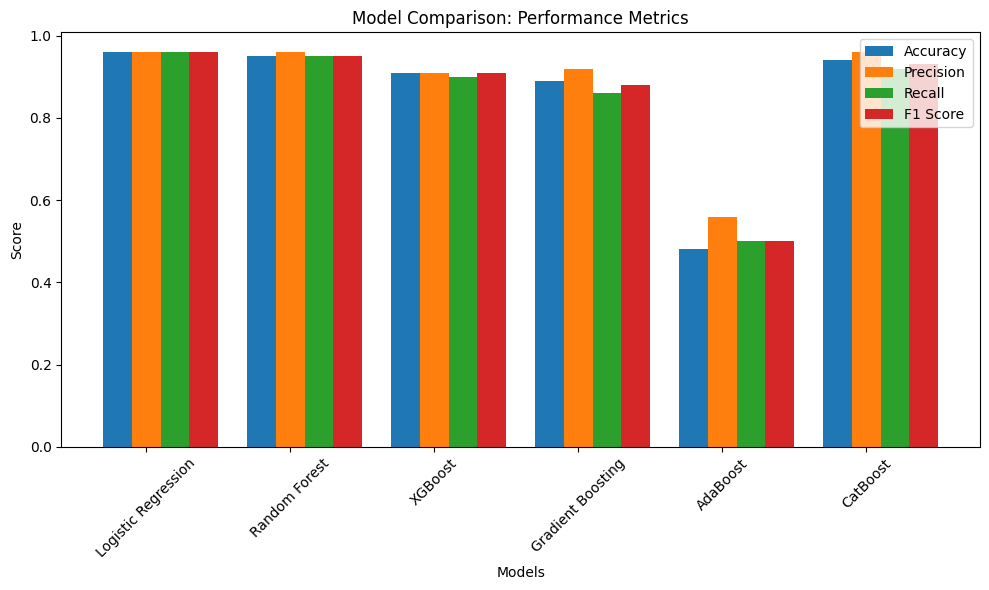

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Store the model performance metrics
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Gradient Boosting', 'AdaBoost', 'CatBoost']
accuracy = [0.96, 0.95, 0.91, 0.89, 0.48, 0.94]
precision = [0.96, 0.96, 0.91, 0.92, 0.56, 0.96]
recall = [0.96, 0.95, 0.90, 0.86, 0.50, 0.92]
f1_score = [0.96, 0.95, 0.91, 0.88, 0.50, 0.93]

# Step 2: Set up bar chart positioning
bar_width = 0.2
index = np.arange(len(models))

# Step 3: Plot the bar charts
plt.figure(figsize=(10, 6))
plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision, bar_width, label='Precision')
plt.bar(index + 2*bar_width, recall, bar_width, label='Recall')
plt.bar(index + 3*bar_width, f1_score, bar_width, label='F1 Score')

# Step 4: Customize the plot
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison: Performance Metrics')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

# Step 5: Display the plot
plt.tight_layout()
plt.show()


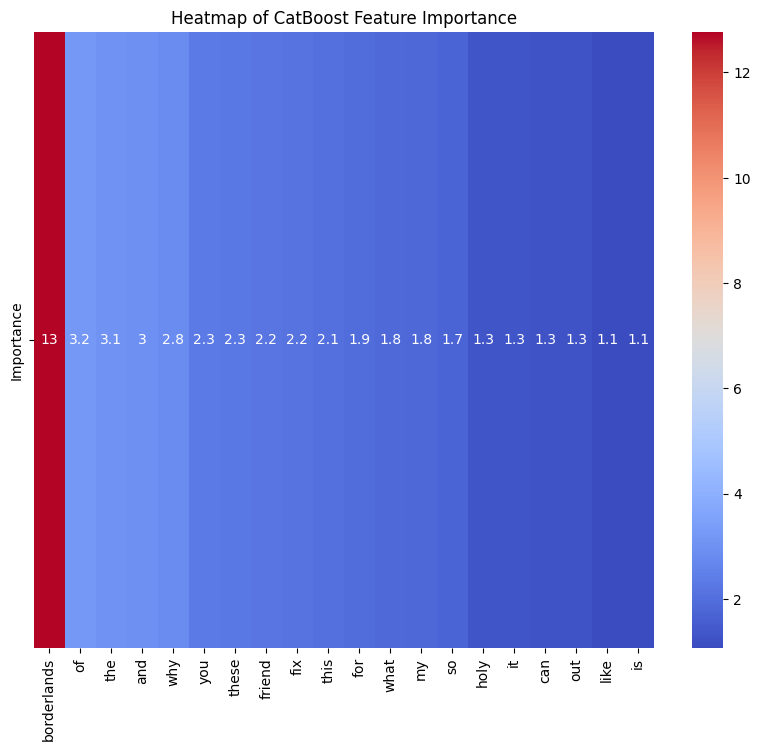

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get feature importance
feature_importance = cat_boost.get_feature_importance()
features = vectorizer.get_feature_names_out()

# Step 2: Create a heatmap-friendly DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Step 3: Sort by importance for better visualization
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)  # Take top 20 for readability

# Step 4: Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(np.array([importance_df['Importance']]), cmap='coolwarm', annot=True, yticklabels=['Importance'], xticklabels=importance_df['Feature'])
plt.title('Heatmap of CatBoost Feature Importance')
plt.show()


<img src="kitty.jpg" width=400px height=400px />

## Kitty is fucking scared


# Tuning Cat’s Hypurr-parameters:

In [42]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Initialize the CatBoost classifier (no need for hyperparameters here)
cat_boost = CatBoostClassifier(verbose=0, auto_class_weights='Balanced')

# Step 2: Define the parameter grid for Randomized Search
param_dist = {
    'iterations': [500, 1000, 1500, 2000],
    'learning_rate': np.linspace(0.01, 0.1, 10),  # Learning rates from 0.01 to 0.1
    'depth': [4, 6, 8, 10],  # Different tree depths
    'l2_leaf_reg': [1, 3, 5, 7, 9],  # Regularization
    'random_strength': [0.5, 1.0, 1.5, 2.0],  # Random splits for regularization
    'bagging_temperature': [0.5, 1.0, 1.5],  # More randomness for generalization
    'bootstrap_type': ['Bernoulli', 'Bayesian'],  # Different bootstrap types
}

# Step 3: Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cat_boost,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings sampled (you can adjust this)
    scoring='accuracy',  # Metric for evaluation
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Parallelize across all cores
)

# Step 4: Fit the Randomized Search on the training data
random_search.fit(X_train, y_train_encoded.ravel())

# Step 5: Print the best hyperparameters found by the search
print("Best Hyperparameters:", random_search.best_params_)

# Step 6: Use the best model from Randomized Search
best_cat_boost = random_search.best_estimator_

# Step 7: Make predictions on the test set with the best model
y_pred_cat = best_cat_boost.predict(X_test)

# Step 8: Evaluate the model with the best found parameters
print("CatBoost Performance after Randomized Search:")
print(classification_report(y_test_encoded, y_pred_cat, target_names=label_encoder.classes_))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

# Sentiment Prediction on New Data (Can This Cat Predict the Future?):

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

train_df = train_df.head(2000)  # Limiting to 1000 rows
valid_df = valid_df.head(400)   # Limiting to 200 rows

# Step 1: Initialize the TfidfVectorizer and fit on the training data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['Tweet_Text'])  # Fit the vectorizer on the training data
X_test = vectorizer.transform(valid_df['Tweet_Text'])  # Transform the validation data

# Step 2: Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_df['Sentiment'])
y_test_encoded = label_encoder.transform(valid_df['Sentiment'])

# Step 3: Initialize the CatBoost classifier
cat_boost = CatBoostClassifier(verbose=0)

# Step 4: Train the CatBoost model on the vectorized tweets
cat_boost.fit(X_train, y_train_encoded)

# Step 5: Make predictions on the test set
y_pred_cat = cat_boost.predict(X_test)

# Step 6: Inverse transform the predicted labels back to their original categories
valid_df['CatBoost_Sentiment'] = label_encoder.inverse_transform(y_pred_cat)

# Step 7: Evaluate CatBoost's performance
print("CatBoost Performance:")
print(classification_report(y_test_encoded, y_pred_cat, target_names=label_encoder.classes_))

# Step 8: Check out the prediction results
print(valid_df[['Tweet_Text', 'CatBoost_Sentiment']].head())


CatBoost Performance:
              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00        29
    Negative       0.91      0.19      0.31        54
     Neutral       0.32      0.25      0.28        61
    Positive       0.30      0.75      0.43        56

    accuracy                           0.34       200
   macro avg       0.38      0.30      0.25       200
weighted avg       0.43      0.34      0.29       200

                                          Tweet_Text CatBoost_Sentiment
0  BBC News - Amazon boss Jeff Bezos rejects clai...           Positive
1  @Microsoft Why do I pay for WORD when it funct...           Negative
2  CSGO matchmaking is so full of closet hacking,...           Positive
3  Now the President is slapping Americans in the...           Positive
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...           Positive


c:\Users\sanjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Looks like our Tuned CatBoost model has taken a bit of creative liberty with its sentiment predictions! It has labeled some clearly intense tweets like "I will kill you" as Positive, which...well, might raise a few eyebrows! Clearly, our model is still working on its "contextual awareness."